In [38]:
# Install all the package
! pip3 install virtualenv
! pip3 install datasets
! pip3 install nltk
! pip3 install seaborn
! pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3

In [ ]:
# I am using the imdb movie review data 
# IMDB dataset has movie reviews for natural language processing or Text analytics.
# it is a binary classification of sentiments to positive or negative labels based on the text of review
# The dataset has two major column the review and its sentiments

In [8]:
import datasets
import pandas as pd
from datasets import load_dataset_builder
from datasets import load_dataset
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import re,string
nltk.download('wordnet')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sushasuresh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sushasuresh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
#  It is helpful to get all the relevant information about a dataset for example imdb
dataset_builder = load_dataset_builder('imdb')
print(dataset_builder.cache_dir)
print(dataset_builder.info.features)
print(dataset_builder.info.splits)


/Users/sushasuresh/.cache/huggingface/datasets/imdb/plain_text/0.0.0/e6281661ce1c48d982bc483cf8a173c1bbeb5d31
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}
{'train': SplitInfo(name='train', num_bytes=33435948, num_examples=25000, shard_lengths=None, dataset_name='imdb'), 'test': SplitInfo(name='test', num_bytes=32653810, num_examples=25000, shard_lengths=None, dataset_name='imdb'), 'unsupervised': SplitInfo(name='unsupervised', num_bytes=67113044, num_examples=50000, shard_lengths=None, dataset_name='imdb')}


In [10]:
# Let us load the train dataset
dataset = load_dataset(
   'imdb')
raw_train = dataset["train"]

In [11]:
print(raw_train[-1])

{'text': 'The story centers around Barry McKenzie who must go to England if he wishes to claim his inheritance. Being about the grossest Aussie shearer ever to set foot outside this great Nation of ours there is something of a culture clash and much fun and games ensue. The songs of Barry McKenzie(Barry Crocker) are highlights.', 'label': 1}


In [12]:
# Let us load the data as pandas df

train_df = dataset["train"].to_pandas()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [13]:
# Let us look at samples

# All the labels 0

train_df.head(5)

text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0

In [14]:
# Let us look at random samples to see both the labels

train_df.sample(5)

text  label
22053  An excellent depiction of one of the more unwh...      1
17584  I gave this movie a 10 because it needed to be...      1
4559   This Worldwide was the cheap man's version of ...      0
3016   Another FRIDAY THE 13TH ripoff, even featuring...      0
5933   Coyote Ugly might have been much more effectiv...      0

In [15]:
# Are there any null values missing values


null_values = train_df.isnull().sum()
null_values.index[0]
print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))

There are 0 missing values for text and 0 missing values for label.


/var/folders/vp/5kppt8jn5bz17c99d5gt99r40000gn/T/ipykernel_37704/4065826532.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))


In [36]:
# Let us check for duplicate values

review = train_df['text']
duplicated_review = train_df[review.isin(review[review.duplicated()])].sort_values("text")
duplicated_review.head(10)

text  label
10888  imagine worst skit saturday night live mad tv ...      0
11127  imagine worst skit saturday night live mad tv ...      0
8485   movie got interesting start road however story...      0
8486   movie got interesting start road however story...      0
13857  tasty little frenchman tell story alternately ...      1
13860  tasty little frenchman tell story alternately ...      1

In [17]:
train_df.drop_duplicates(inplace = True)
print('The dataset contains {} rows and {} columns after removing duplicates'.format(train_df.shape[0],train_df.shape[1]))

The dataset contains 24904 rows and 2 columns after removing duplicates


In [18]:
stop = stopwords.words('english')
wl = WordNetLemmatizer()

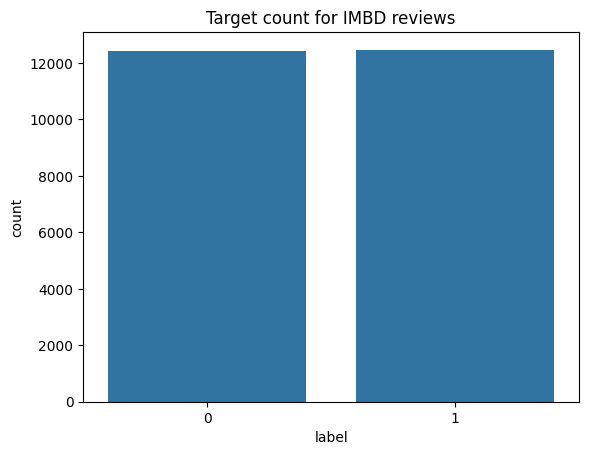

In [19]:

sns.countplot(x='label', data=train_df)
plt.title('Target count for IMBD reviews')
plt.show()

In [20]:
print('Positive reviews are', (round(train_df['label'].value_counts()[0])),'i.e.', round(train_df['label'].value_counts()[0]/len(train_df) * 100,2), '% of the dataset')
print('Negative reviews are', (round(train_df['label'].value_counts()[1])),'i.e.',round(train_df['label'].value_counts()[1]/len(train_df) * 100,2), '% of the dataset')

Positive reviews are 12432 i.e. 49.92 % of the dataset
Negative reviews are 12472 i.e. 50.08 % of the dataset


In [21]:
stop = stopwords.words('english')
wl = WordNetLemmatizer()

In [22]:
# handle internet slang
# Stolen from previous project

mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": 
"she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" ,
           "AFAIK": "As Far As I Know",
           "AFK": "Away From Keyboard",
            "ASAP": "As Soon As Possible",
            "ATK": "At The Keyboard",
            "ATM": "At The Moment",
            "A3": "Anytime, Anywhere, Anyplace",
            "BAK": "Back At Keyboard",
            "BBL": "Be Back Later",
            "BBS": "Be Back Soon",
            "BFN": "Bye For Now",
            "B4N": "Bye For Now",
            "BRB": "Be Right Back",
            "BRT": "Be Right There",
            "BTW": "By The Way",
            "B4": "Before",
            "B4N": "Bye For Now",
            "CU": "See You",
            "CUL8R": "See You Later",
            "CYA": "See You",
            "FAQ": "Frequently Asked Questions",
            "FC": "Fingers Crossed",
            "FWIW": "For What It's Worth",
            "FYI": "For Your Information",
            "GAL": "Get A Life",
            "GG": "Good Game",
            "GN": "Good Night",
            "GMTA": "Great Minds Think Alike",
            "GR8": "Great!",
            "G9": "Genius",
            "IC": "I See",
            "ICQ": "I Seek you (also a chat program)",
            "ILU": "ILU: I Love You",
            "IMHO": "In My Honest/Humble Opinion",
            "IMO": "In My Opinion",
            "IOW": "In Other Words",
            "IRL": "In Real Life",
            "KISS": "Keep It Simple, Stupid",
            "LDR": "Long Distance Relationship",
            "LMAO": "Laugh My A.. Off",
            "LOL": "Laughing Out Loud",
            "LTNS": "Long Time No See",
            "L8R": "Later",
            "MTE": "My Thoughts Exactly",
            "M8": "Mate",
            "NRN": "No Reply Necessary",
            "OIC": "Oh I See",
            "PITA": "Pain In The A..",
            "PRT": "Party",
            "PRW": "Parents Are Watching",
            "QPSA?": "Que Pasa?",
            "ROFL": "Rolling On The Floor Laughing",
            "ROFLOL": "Rolling On The Floor Laughing Out Loud",
            "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
            "SK8": "Skate",
            "STATS": "Your sex and age",
            "ASL": "Age, Sex, Location",
            "THX": "Thank You",
            "TTFN": "Ta-Ta For Now!",
            "TTYL": "Talk To You Later",
            "U": "You",
            "U2": "You Too",
            "U4E": "Yours For Ever",
            "WB": "Welcome Back",
            "WTF": "What The F...",
            "WTG": "Way To Go!",
            "WUF": "Where Are You From?",
            "W8": "Wait...",
            "7K": "Sick:-D Laugher",
            "TFW": "That feeling when",
            "MFW": "My face when",
            "MRW": "My reaction when",
            "IFYP": "I feel your pain",
            "TNTL": "Trying not to laugh",
            "JK": "Just kidding",
            "IDC": "I don't care",
            "ILY": "I love you",
            "IMU": "I miss you",
            "ADIH": "Another day in hell",
            "ZZZ": "Sleeping, bored, tired",
            "WYWH": "Wish you were here",
            "TIME": "Tears in my eyes",
            "BAE": "Before anyone else",
            "FIMH": "Forever in my heart",
            "BSAAW": "Big smile and a wink",
            "BWL": "Bursting with laughter",
            "BFF": "Best friends forever",
            "CSL": "Can't stop laughing"
        }

In [23]:
#function to clean data 

def clean_text(text,lemmatize = True):
    soup = BeautifulSoup(text, "html.parser") #remove html tags
    text = soup.get_text()
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    # text = re.sub(r'https?://\S+|www\.\S+')
    text = re.sub(r'http\S+', '', text) #remove urls 
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove punctuation
    #tokens = re.split('\W+', text) #create tokens
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    else:
        text = " ".join([word for word in text.split() if word not in stop and word.isalpha()]) 
    return text

In [24]:
data_copy = train_df.copy()

In [25]:
train_df['text']=train_df['text'].apply(clean_text,lemmatize = True)

/var/folders/vp/5kppt8jn5bz17c99d5gt99r40000gn/T/ipykernel_37704/2469618094.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser") #remove html tags


In [26]:
print(train_df['text'][0])

rented curiousyellow video store controversy surrounded first released also heard first seized u custom ever tried enter country therefore fan film considered controversial really see plot centered around young swedish drama student named lena want learn everything life particular want focus attention making sort documentary average swede thought certain political issue vietnam war race issue united state asking politician ordinary denizen stockholm opinion politics sex drama teacher classmate married men kill curiousyellow year ago considered pornographic really sex nudity scene far even shot like cheaply made porno countryman mind find shocking reality sex nudity major staple swedish cinema even ingmar bergman arguably answer good old boy john ford sex scene film commend filmmaker fact sex shown film shown artistic purpose rather shock people make money shown pornographic theater america curiousyellow good film anyone wanting study meat potato pun intended swedish cinema really film 

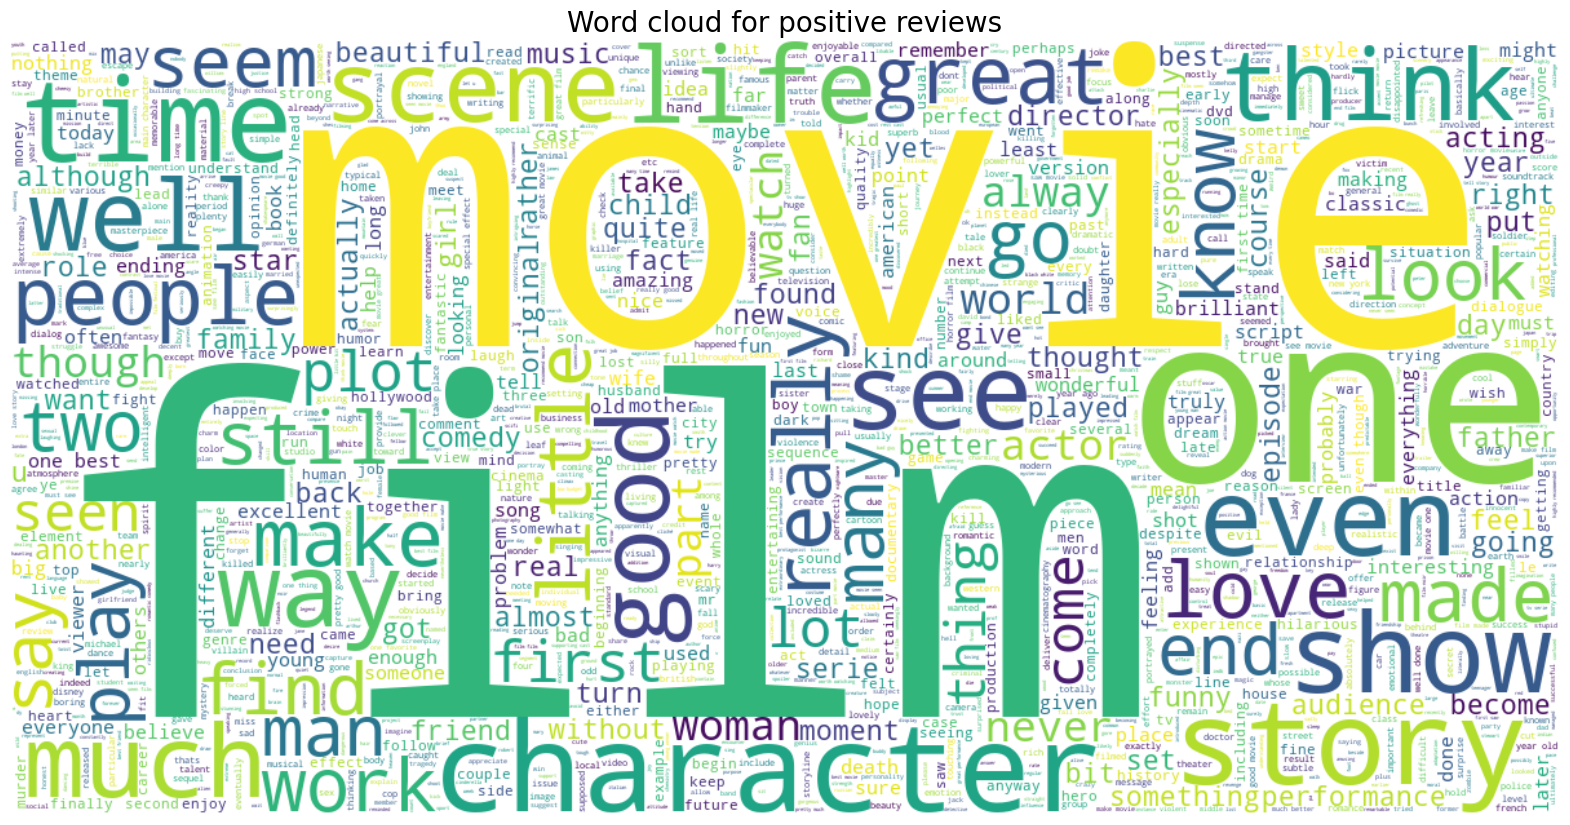

In [27]:

#word cloud for positive reviews
positive_data = train_df[train_df.label == 1]['text']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

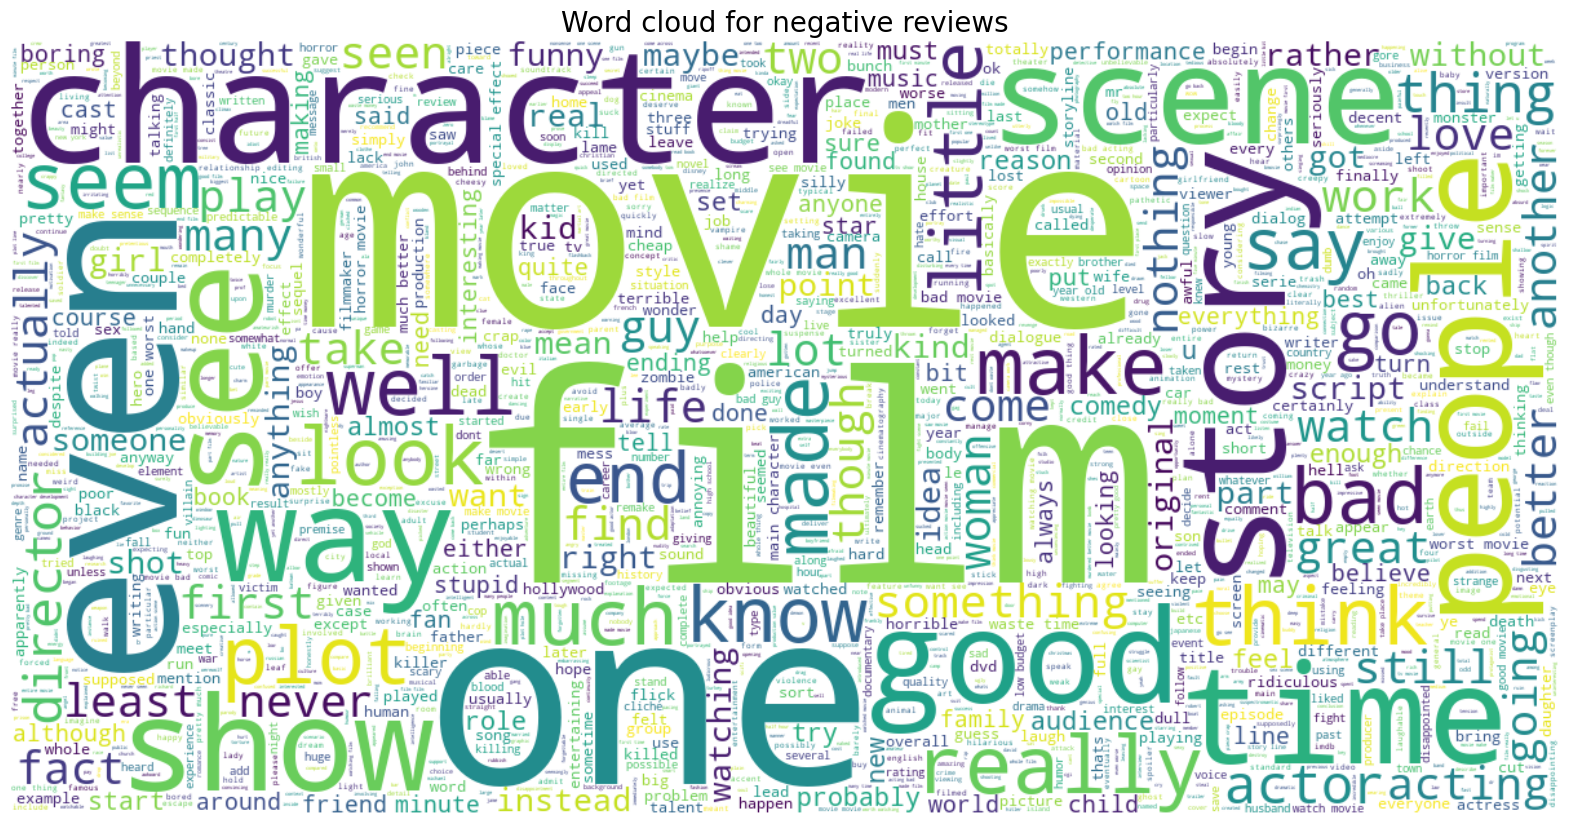

In [28]:
#word cloud for negative reviews
negative_data = train_df[train_df.label == 0]['text']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

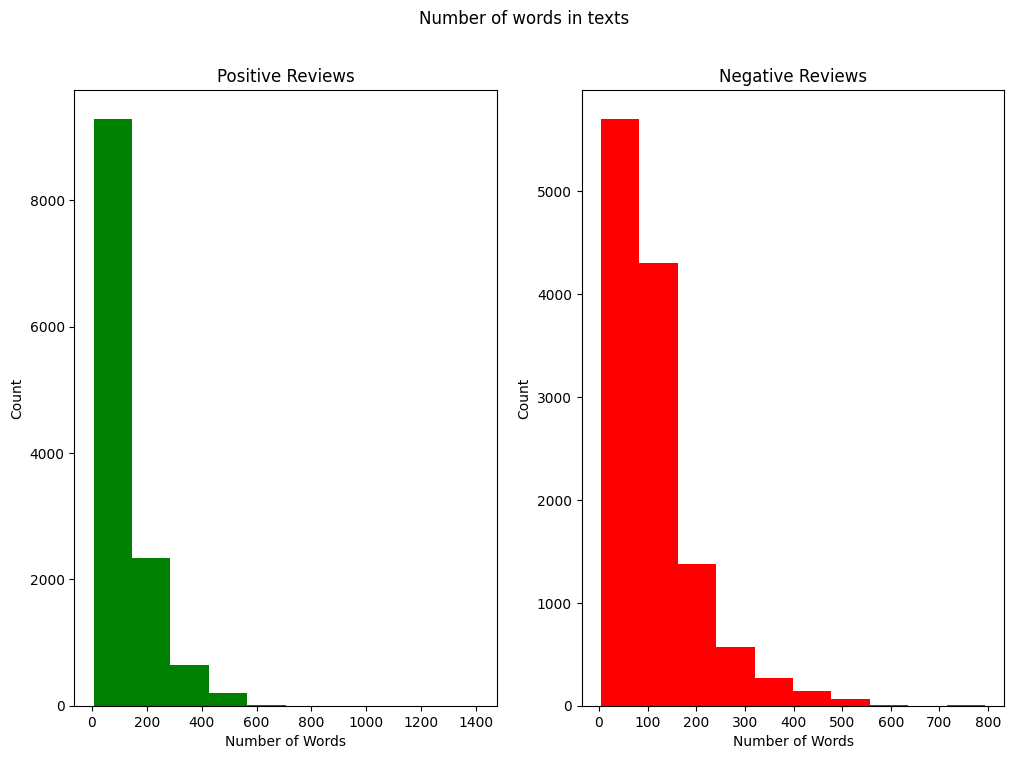

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

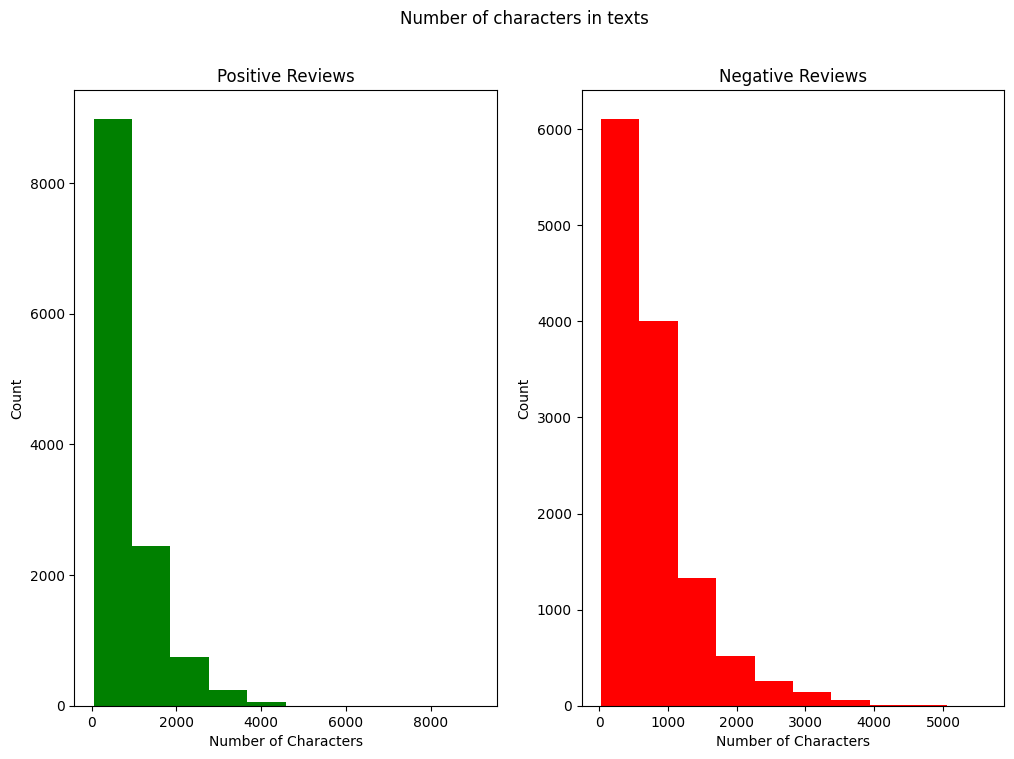

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

/var/folders/vp/5kppt8jn5bz17c99d5gt99r40000gn/T/ipykernel_37704/3932708398.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word, ax=ax1,color='green')
/var/folders/vp/5kppt8jn5bz17c99d5gt99r40000gn/T/ipykernel_37704/3932708398.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word,ax=ax2,

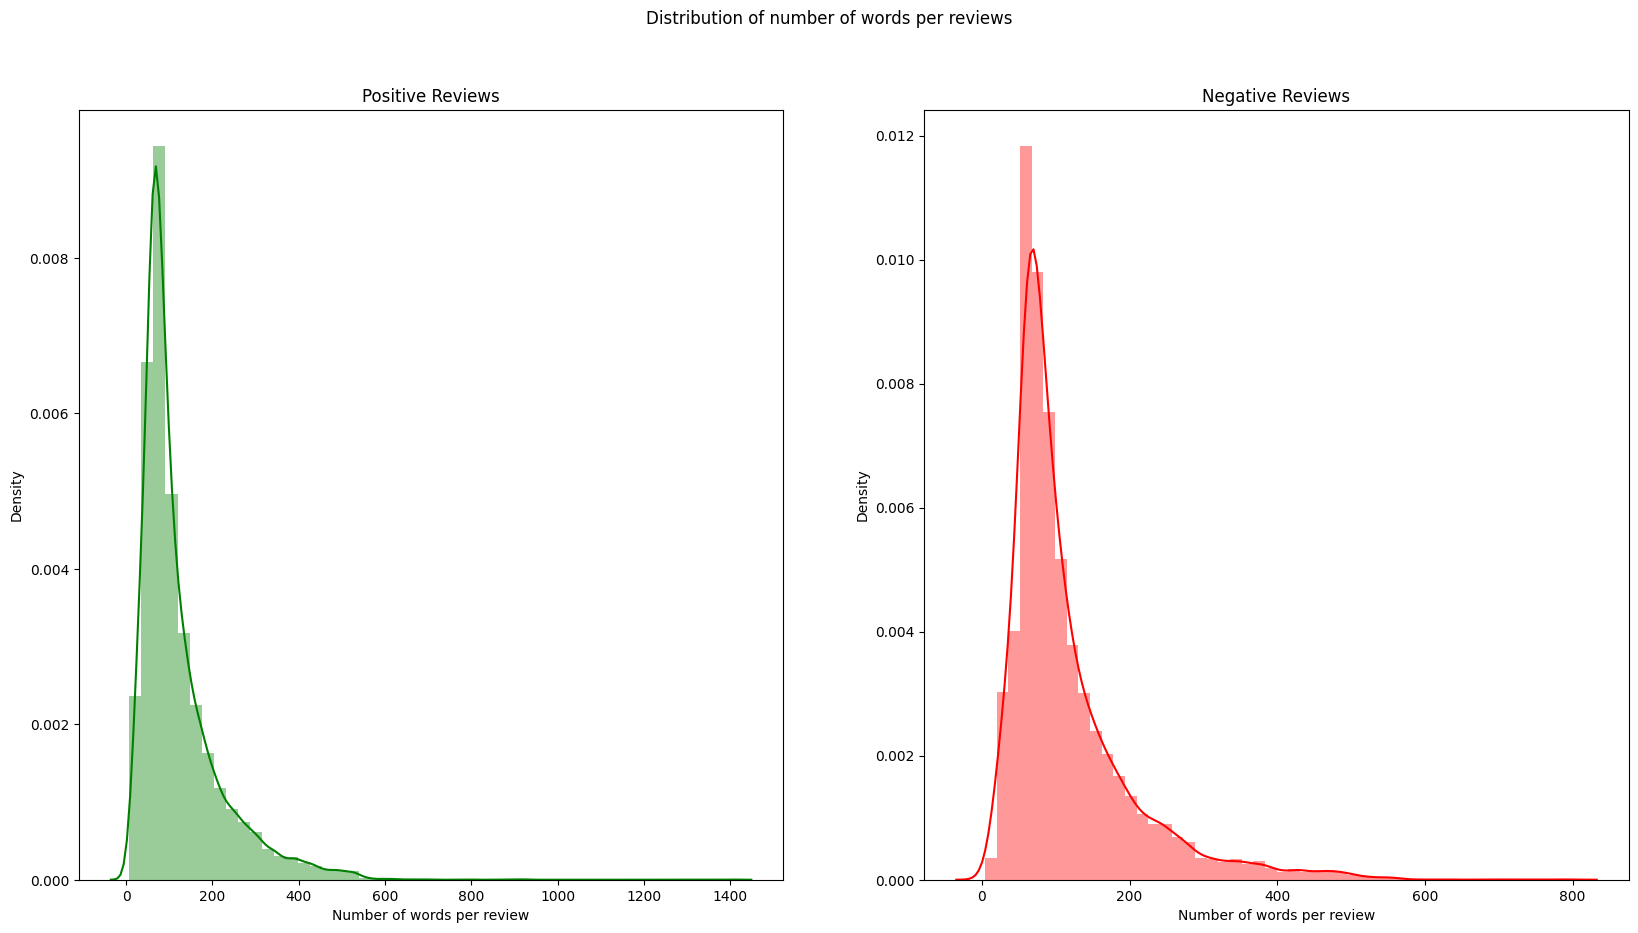

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

In [32]:

def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

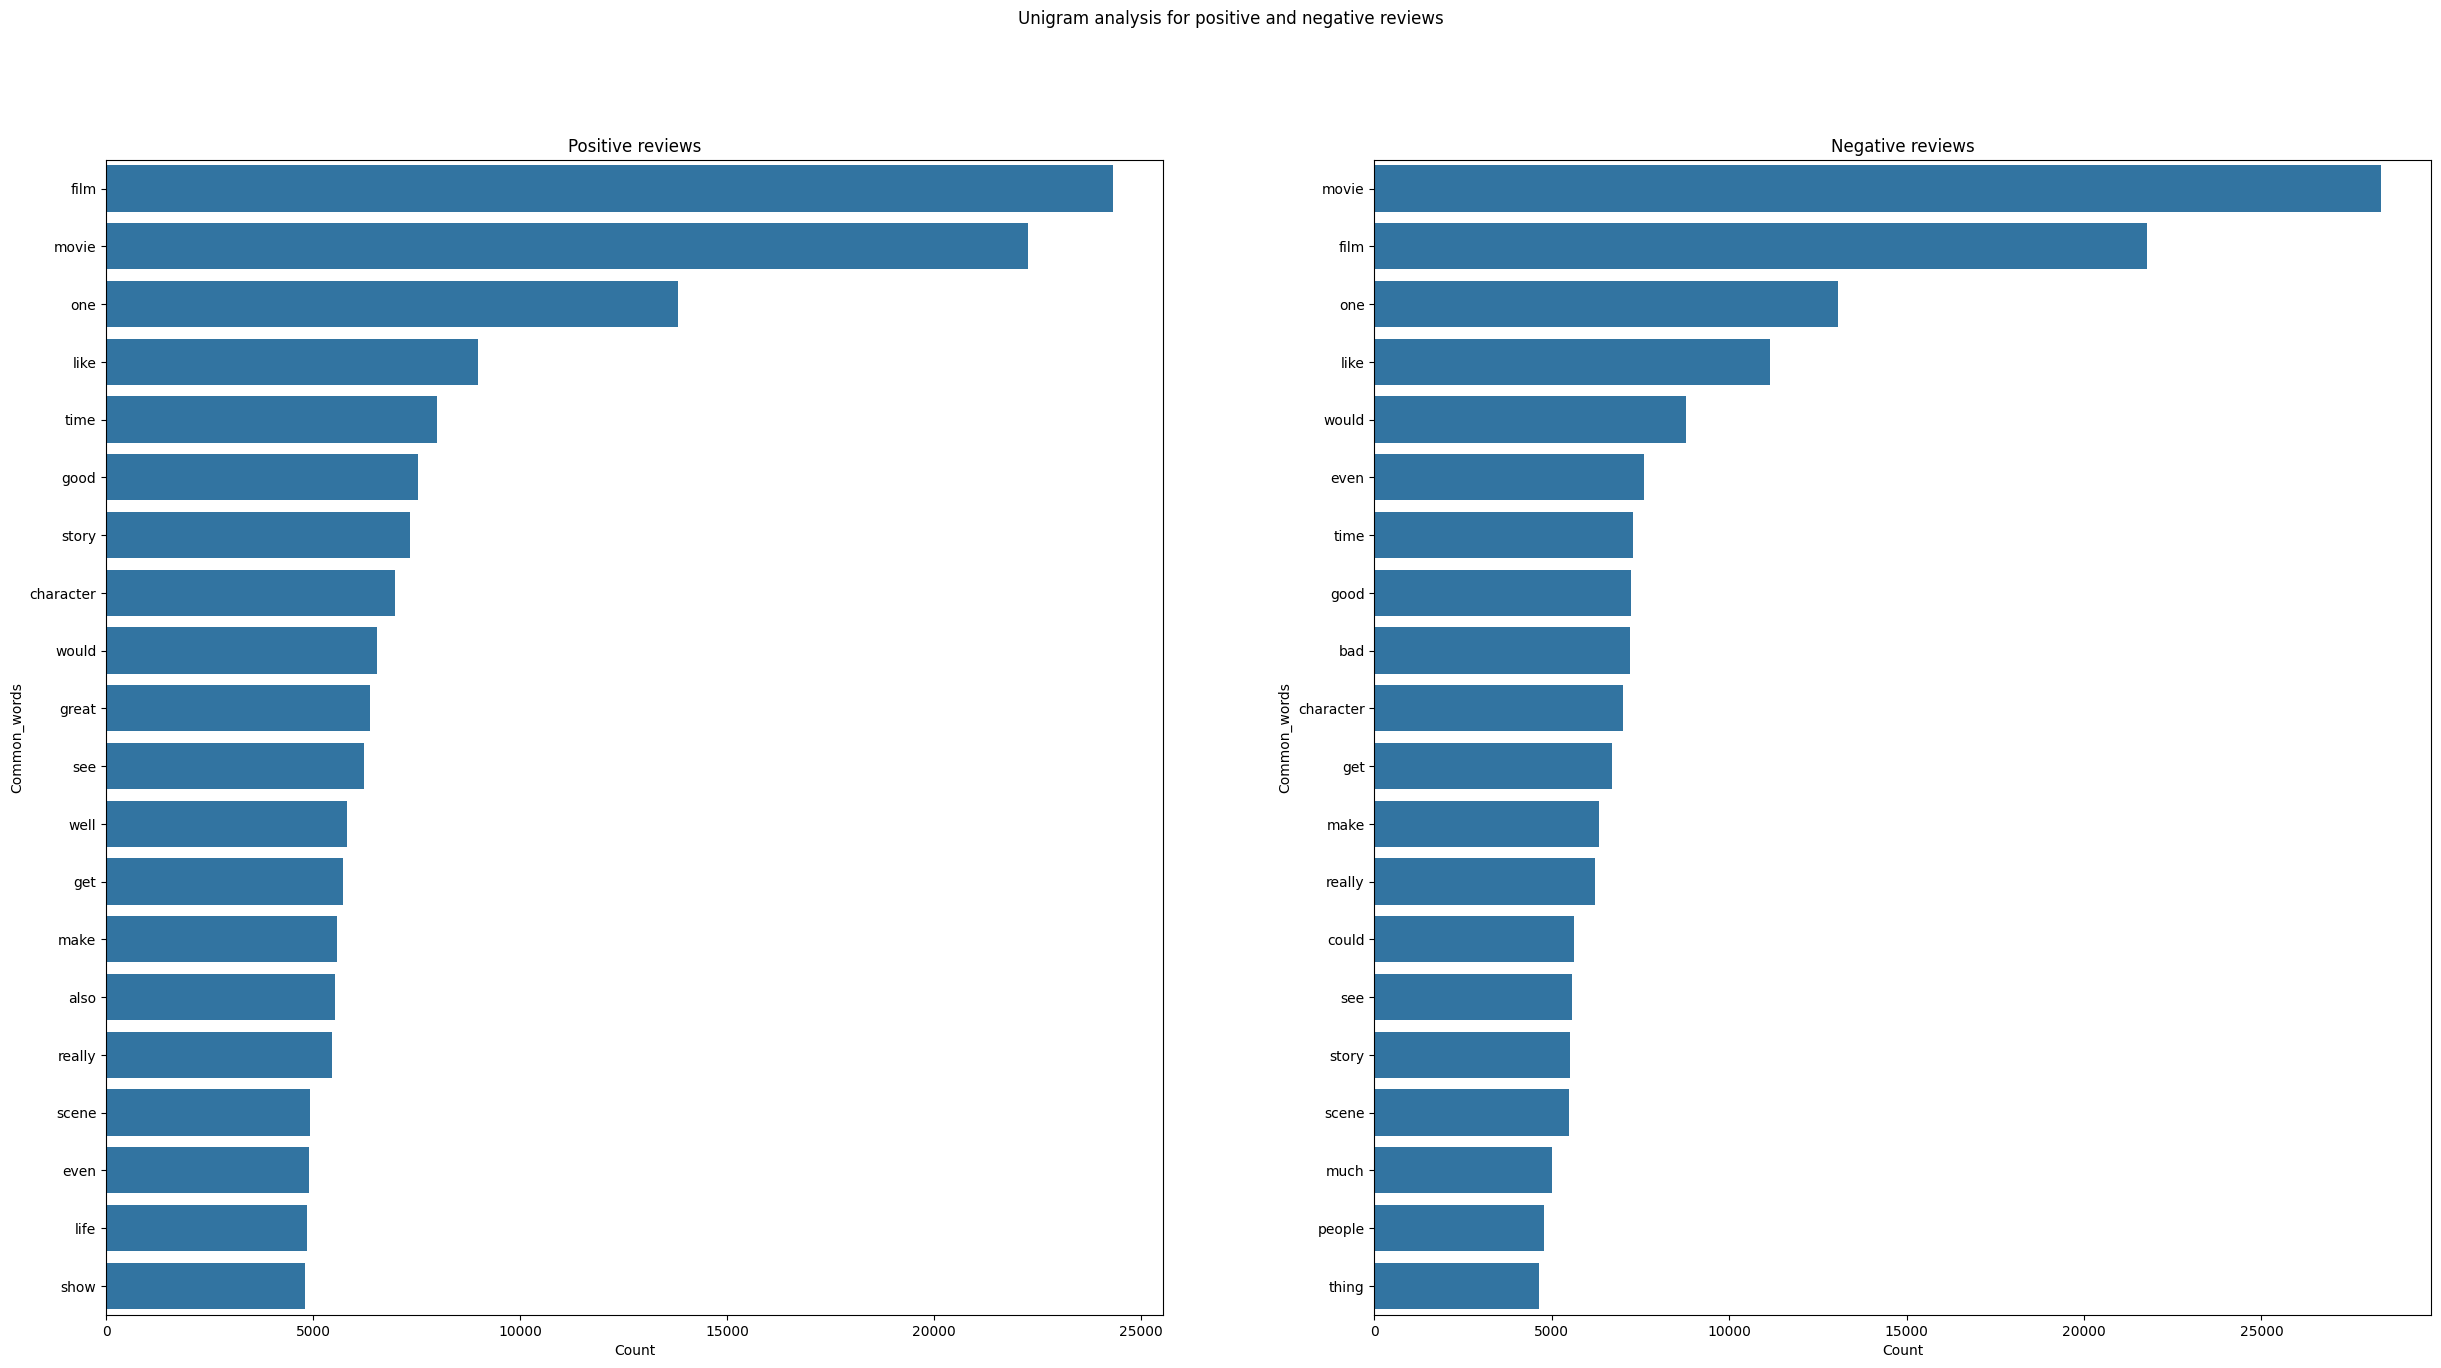

In [33]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()

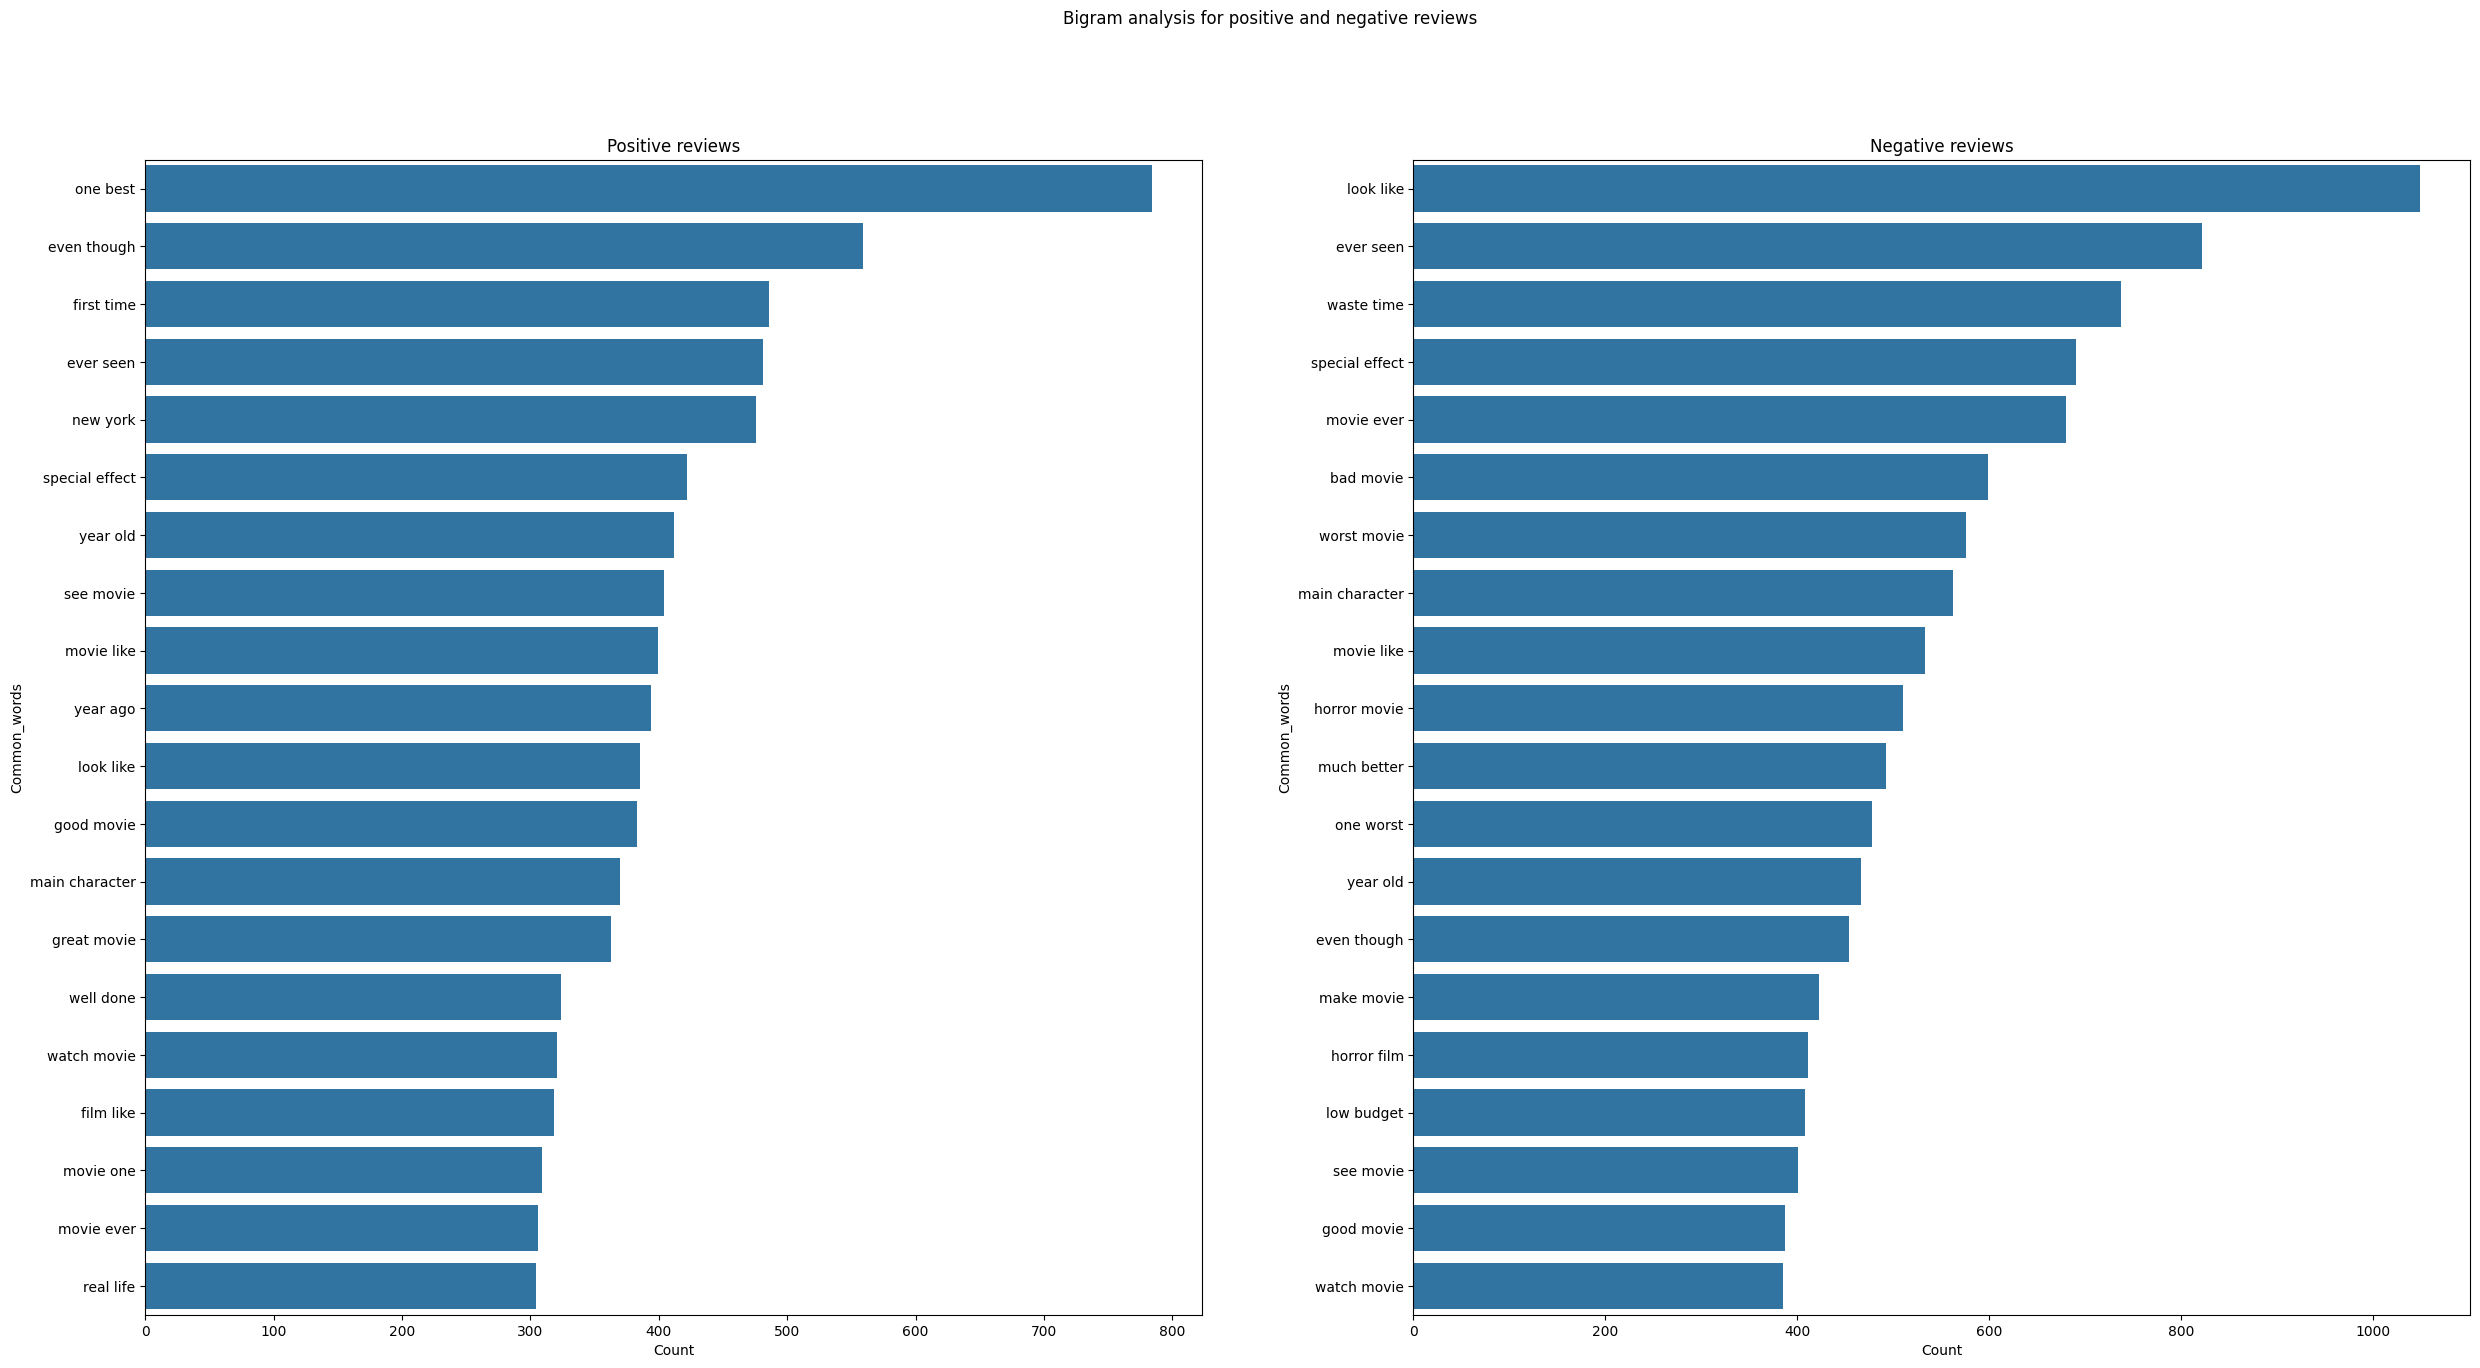

In [34]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

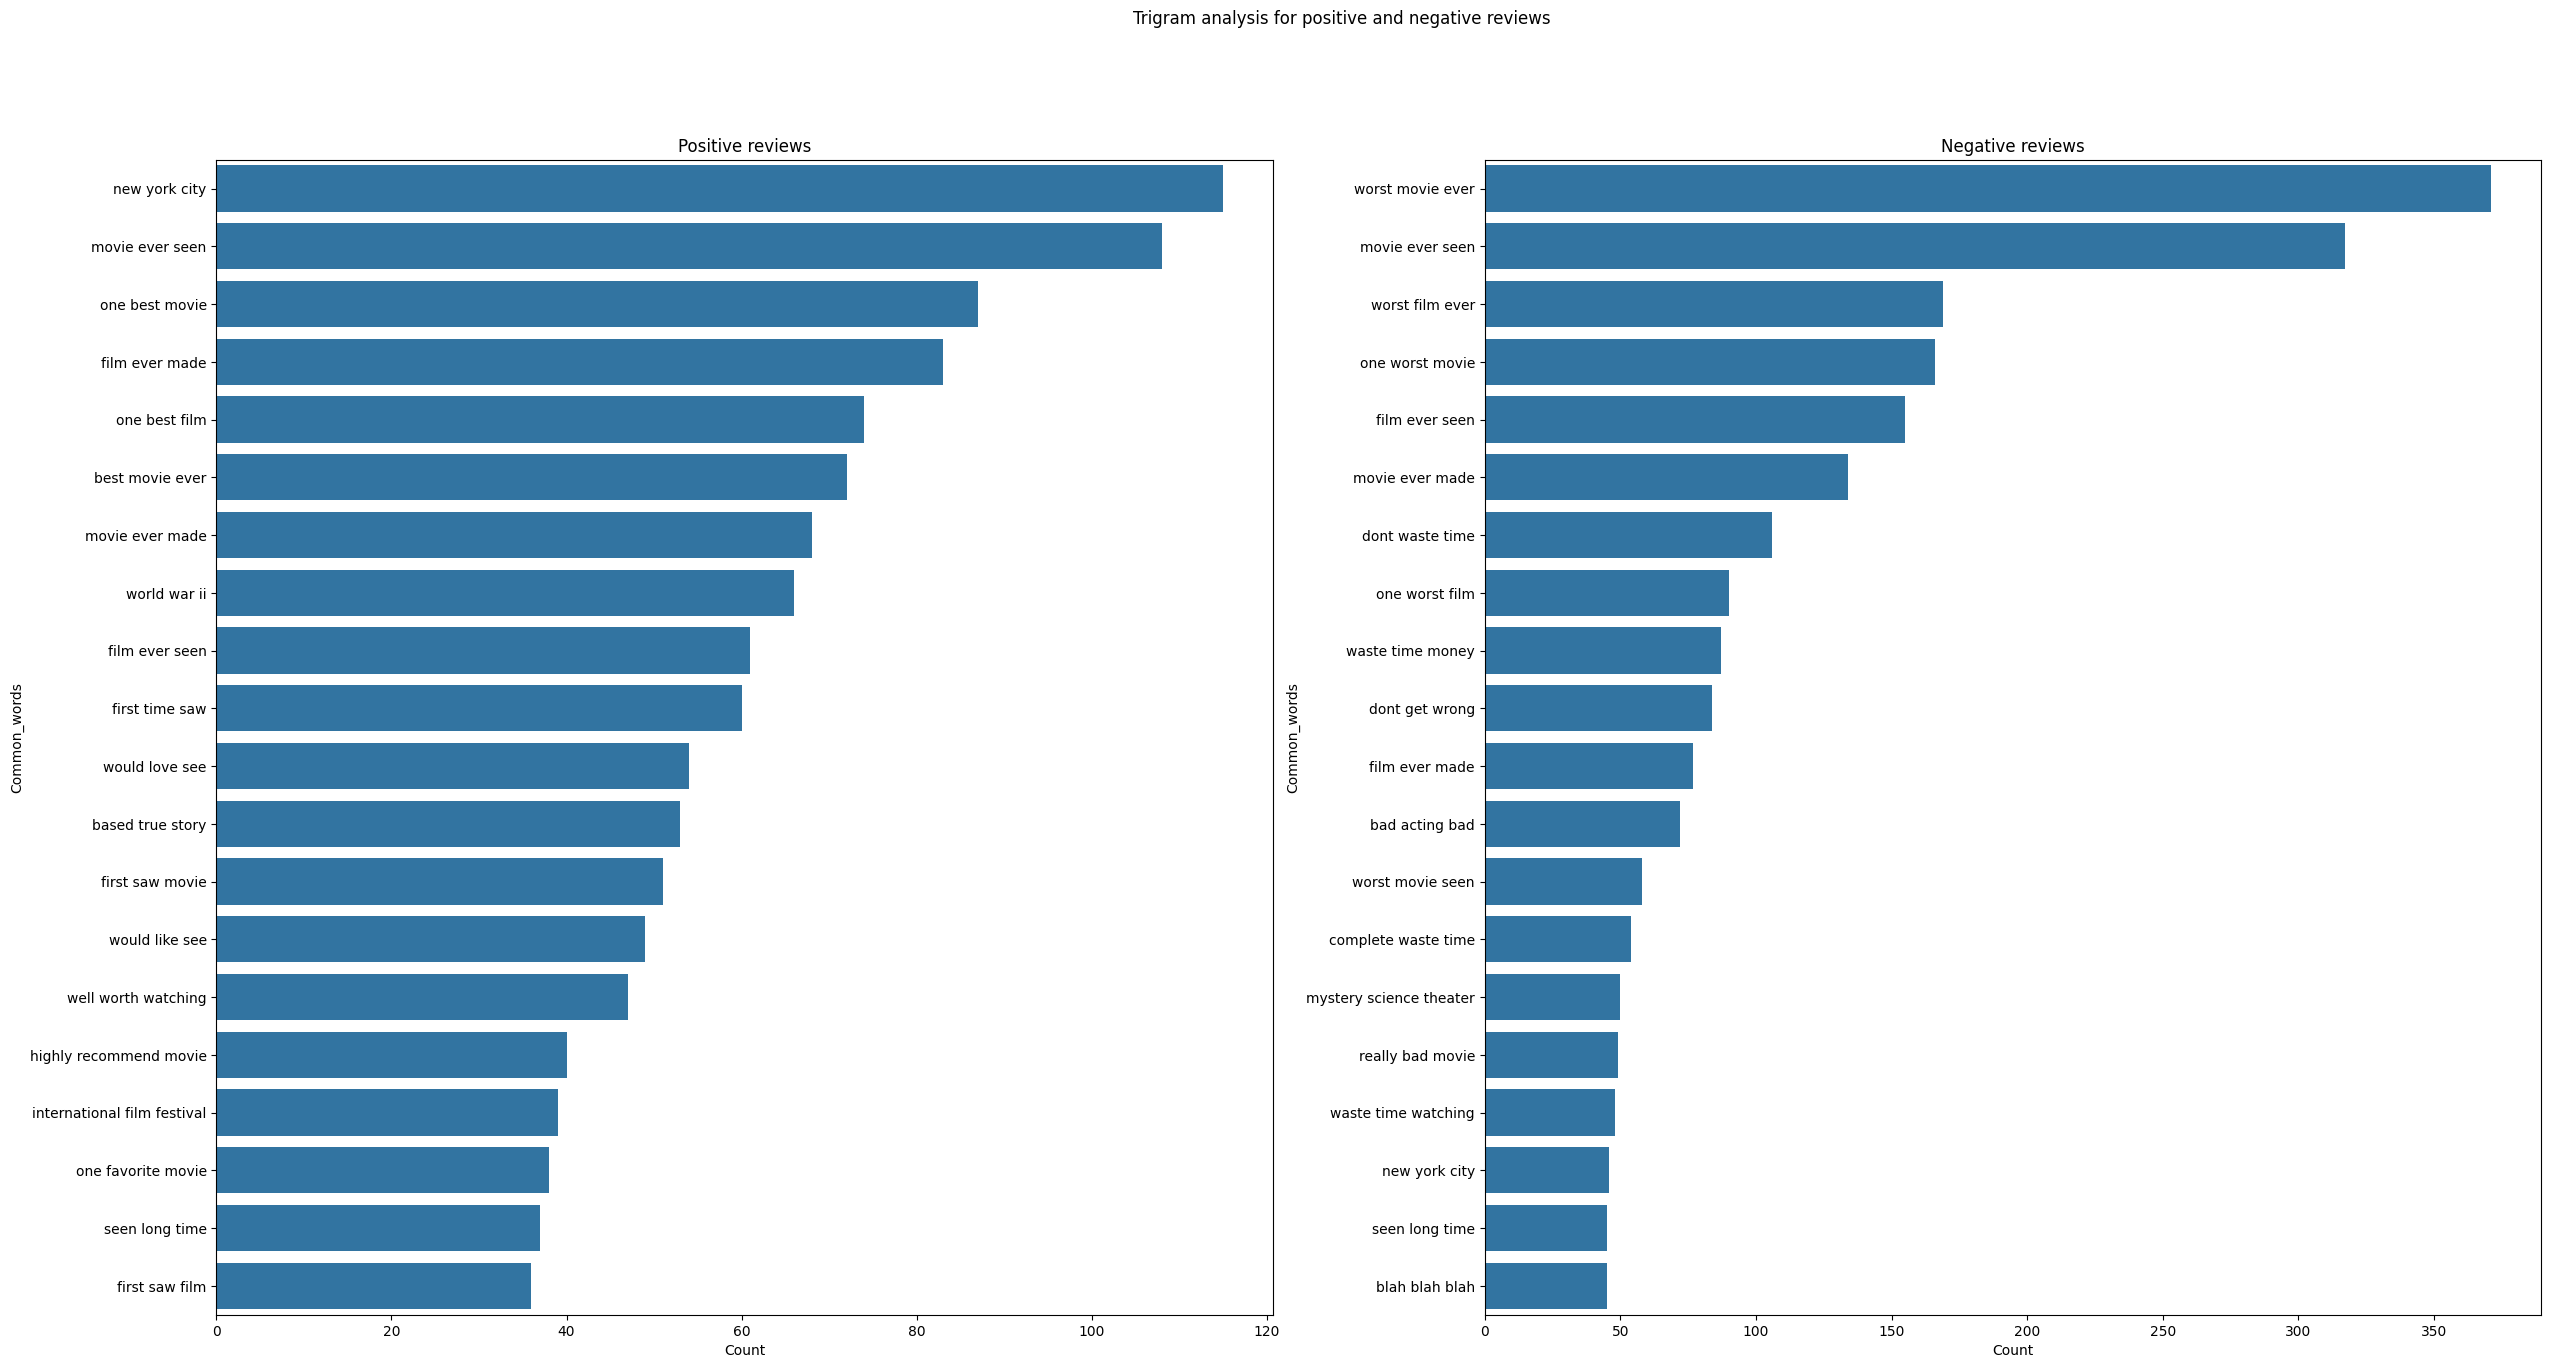

In [35]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()